In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
from timeit import default_timer as timer
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.layers import Conv2D, MaxPooling2D,Activation, Flatten, Dense, Dropout, BatchNormalization, LSTM, ConvLSTM2D
from keras.losses import categorical_crossentropy

Num GPUs Available:  0


In [3]:
train_path = r'E:/minor project 2024/dataset mri new/Combined Dataset/train'
test_path = r'E:/minor project 2024/dataset mri new/Combined Dataset/test'

In [4]:
image_size = (150, 150)

batch_size = 32

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 10240 images belonging to 4 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

Found 1279 images belonging to 4 classes.


In [7]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label in in train and validation datasets\n")

for key, value in labels.items():
    print(f'{key} : {value}')

Label in in train and validation datasets

0 : Mild Impairment
1 : Moderate Impairment
2 : No Impairment
3 : Very Mild Impairment


In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,308,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,403,716 (20.61 MB)

 Trainable params: 5,403,012 (20.61 MB)

 Non-trainable params: 704 (2.75 KB)

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience = 5, min_lr =1e-6, verbose=1)

In [13]:
with tf.device('/GPU:0'):
    start = timer()
    history = model.fit(train_generator, validation_data = validation_generator, batch_size = 64, epochs= 40, verbose = 1)
    end = timer()

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5634 - loss: 1.0412

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


320/320 ━━━━━━━━━━━━━━━━━━━━ 547s 2s/step - accuracy: 0.5637 - loss: 1.0406 - val_accuracy: 0.3503 - val_loss: 23.0992
Epoch 2/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 498s 2s/step - accuracy: 0.7418 - loss: 0.5946 - val_accuracy: 0.2995 - val_loss: 2.3639
Epoch 3/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 473s 1s/step - accuracy: 0.7431 - loss: 0.5724 - val_accuracy: 0.3292 - val_loss: 1.5768
Epoch 4/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 423s 1s/step - accuracy: 0.7797 - loss: 0.4924 - val_accuracy: 0.4292 - val_loss: 1.1875
Epoch 5/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 410s 1s/step - accuracy: 0.7918 - loss: 0.4773 - val_accuracy: 0.6450 - val_loss: 0.7491
Epoch 6/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 444s 1s/step - accuracy: 0.8022 - loss: 0.4461 - val_accuracy: 0.3933 - val_loss: 2.0521
Epoch 7/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 429s 1s/step - accuracy: 0.8137 - loss: 0.4125 - val_accuracy: 0.6153 - val_loss: 1.1114
Epoch 8/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 419s 1s/step - accuracy: 0.8128 - loss: 0.4204 - val_accuracy: 0.60

In [14]:
model.evaluate(validation_generator)

40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 284ms/step - accuracy: 0.9038 - loss: 0.2519


[0.25654304027557373, 0.8967943787574768]

In [15]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss')

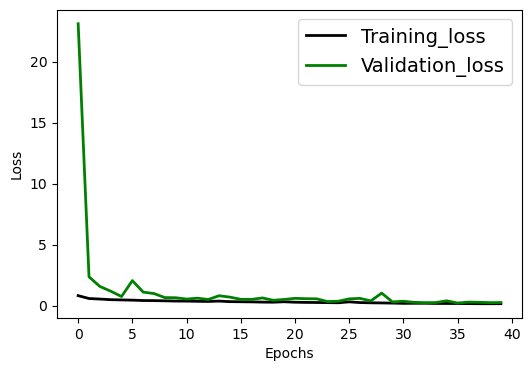

In [16]:
plt.figure(figsize=[6, 4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training_loss', 'Validation_loss'],fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)

In [17]:
test_predictions = model.predict(validation_generator)
test_predictions_classes = np.where(test_predictions > 0.5, 1, 0)

40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 276ms/step


In [18]:
print("GPU time: ", end - start)

GPU time:  17782.9616025


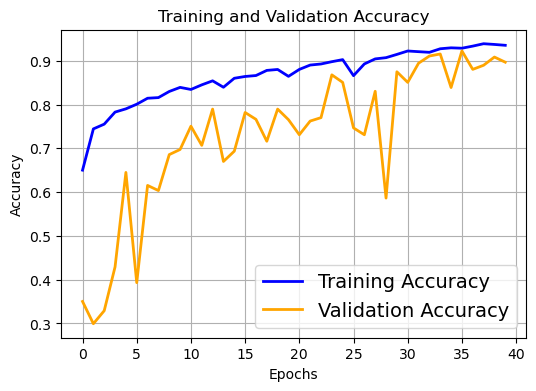

In [22]:
# Accuracy Plot
plt.figure(figsize=[6, 4])
plt.plot(history.history['accuracy'], 'blue', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'orange', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Training and Validation Accuracy')
plt.grid()
plt.show()

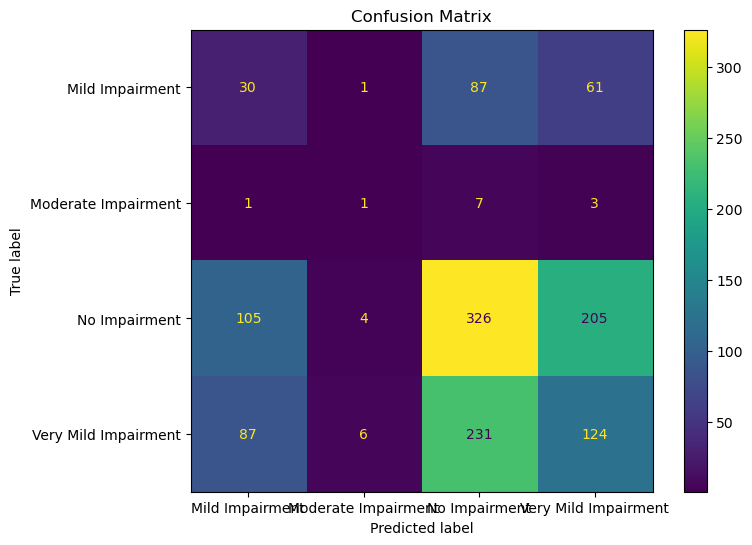

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Obtain true labels and predictions
true_classes = validation_generator.classes
predicted_classes = np.argmax(test_predictions, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=labels.values())
disp.plot(cmap='viridis', ax=plt.gca())
plt.title('Confusion Matrix')
plt.show()


In [24]:
from sklearn.metrics import classification_report

# Classification report
class_report = classification_report(true_classes, predicted_classes, target_names=labels.values())
print("Classification Report:\n")
print(class_report)

Classification Report:

                      precision    recall  f1-score   support

     Mild Impairment       0.13      0.17      0.15       179
 Moderate Impairment       0.08      0.08      0.08        12
       No Impairment       0.50      0.51      0.51       640
Very Mild Impairment       0.32      0.28      0.29       448

            accuracy                           0.38      1279
           macro avg       0.26      0.26      0.26      1279
        weighted avg       0.38      0.38      0.38      1279



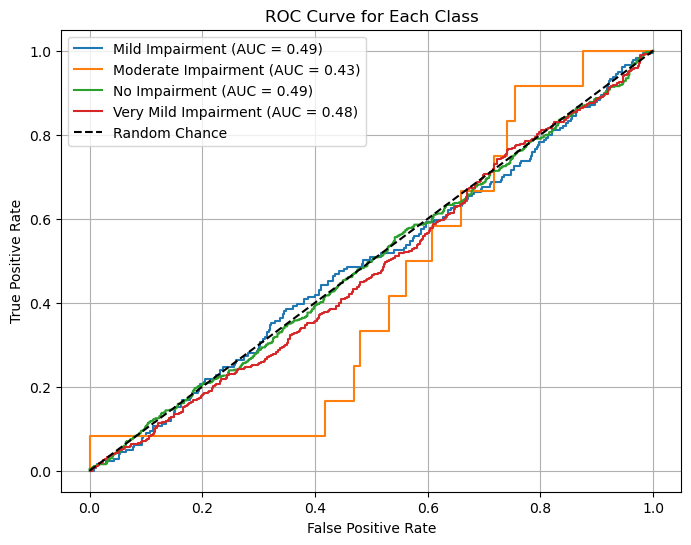

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels
true_classes_binary = label_binarize(true_classes, classes=list(labels.keys()))

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i, class_name in labels.items():
    fpr, tpr, _ = roc_curve(true_classes_binary[:, i], test_predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curve for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

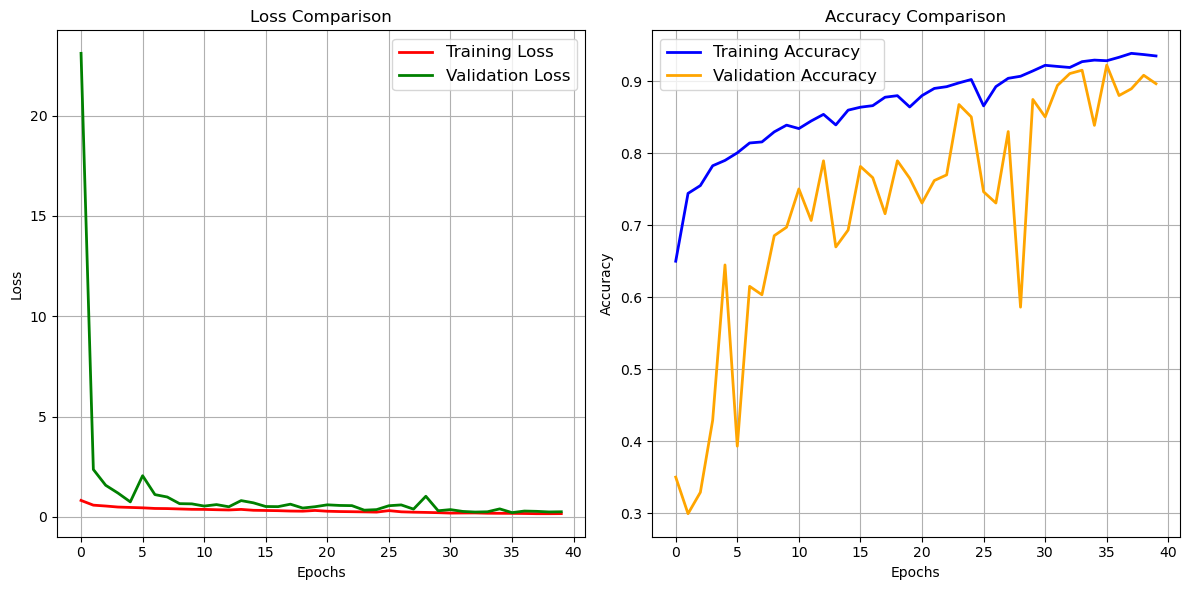

In [26]:
plt.figure(figsize=[12, 6])

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'red', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Comparison')
plt.grid()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'blue', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'orange', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Comparison')
plt.grid()

plt.tight_layout()
plt.show()

In [28]:
model.save('alzheimer_cnn_model_20thnov.h5')